# Cobweb Process

### Modeling
Let's model the cobweb process into code.

In [2]:
!pip install pynverse

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from pynverse import inversefunc # this package provides inverse function

In [4]:
def plotMarket(D, S, Q_max, P_max):
    plt.xlim(left = 0)
    plt.xlim(right = Q_max)
    plt.ylim(bottom = 0)
    plt.ylim(top = P_max)
    rangeP = np.linspace(0, P_max, P_max * 100)
    plt.plot(list(map(D, rangeP)), rangeP)
    plt.plot(list(map(S, rangeP)), rangeP)

def connectPoints(point1, point2):
    plt.plot([point1[0], point2[0]],[point1[1], point2[1]] , 'k-', linewidth = 1)
    
def cobwebProcess(D, S, S_adj, init_price, ϵ, periods):
    P = init_price
    S_inv = inversefunc(S)
    
    for i in range(periods):
        S_cur = [S(P), P]
        D_cur = [D(P), P]
        connectPoints(S_cur, D_cur)
        # Supplier is adjusting Quantity, according to current demand
        Q = S_adjusting_function(D(P))
        P = S_inv(Q)    
        S_next = [Q, P]
        connectPoints(D_cur, S_next)
        
        # if market is near equilibrium, break.
        if(abs(D(P) - S(P)) < ϵ):
            print("Market is in equilibrium.\n",\
                  "Iteration: ", i+1, "\n",\
                  "-Supply side\n",\
                  "P: ", P, "\n",\
                  "Q: ", S(P), "\n", \
                  "-Demand side\n",\
                  "P: ", P, "\n",\
                  "Q: ", D(P), "\n", \
                 )
            break
        
        # if market was not able to reach equilibrium, report.
        if((i == periods - 1) and (abs(D(P) - S(P)) >= ϵ)):
            print("Economy wasn't able to reach equilibrium.\n",\
                  "-Supply side\n",\
                  "P: ", P, "\n",\
                  "Q: ", S(P), "\n", \
                  "-Demand side\n",\
                  "P: ", P, "\n",\
                  "Q: ", D(P), "\n", \
                 )

### Case Study
Let's do some case analysis. 

**case 1** : To Equilibrium

$$ D: Q = 1 - P $$

$$ S: Q = P $$

$$ Adj: Q_{n+1} = D(Q_n) * 0.9 $$

$$ P_0 = 0 $$

Market is in equilibrium.
 Iteration:  27 
 -Supply side
 P:  0.5012288227909136 
 Q:  0.5012288227909136 
 -Demand side
 P:  0.5012288227909136 
 Q:  0.49877117720908637 



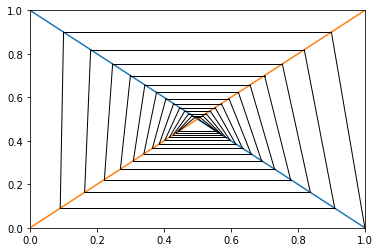

In [5]:
D = lambda P: 1-P
S = lambda P: P
S_adjusting_function = lambda Q: 0.9* Q
init_price = 0
Q_max = 1
P_max = 1

plotMarket(D, S, Q_max, P_max)
cobwebProcess(D, S, S_adjusting_function, init_price, 0.01, 100)
plt.show()

**case 2**: Unreachable Equilibrium

$$ D: Q = 1 - P $$

$$ S: Q = P $$

$$ Adj: Q_{n+1} = D(Q_n) * 0.6 $$

$$ P_0 = 0 $$

Economy wasn't able to reach equilibrium.
 -Supply side
 P:  0.37499999999999994 
 Q:  0.37499999999999994 
 -Demand side
 P:  0.37499999999999994 
 Q:  0.625 



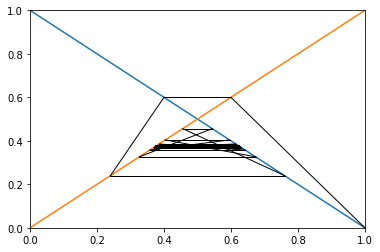

In [6]:
D = lambda P: 1-P
S = lambda P: P
S_adjusting_function = lambda Q: 0.6 * Q
init_price = 0
Q_max = 1
P_max = 1

plotMarket(D, S, Q_max, P_max)
cobwebProcess(D, S, S_adjusting_function, init_price, 0.01, 100)
plt.show()

**case 3**: Square Supply

$$ D: Q = 100 - P $$

$$ S: Q = \frac{ P^2 }{100} $$

$$ Adj: Q_{n+1} = 0.9 * D(Q_n) $$

$$ P_0 = 0 $$

Market is in equilibrium.
 Iteration:  13 
 -Supply side
 P:  61.58917120536864 
 Q:  37.9322600976421 
 -Demand side
 P:  61.58917120536864 
 Q:  38.41082879463136 



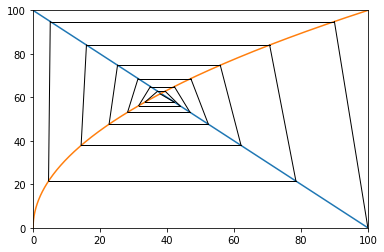

In [14]:
D = lambda P: 100-P
S = lambda P: (P**2)/100
S_adjusting_function = lambda Q: 0.9 * Q
init_price = 0
Q_max = 100
P_max = 100

plotMarket(D, S, Q_max, P_max)
cobwebProcess(D, S, S_adjusting_function, init_price, 1, 100)
plt.show()